<a href="https://colab.research.google.com/github/zachjilani/deeplearning/blob/master/Model_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.

What are the inputs?
- The inputs are 50,000 color images

What are the labels?
- There are 10 labels. These labels from 0-9 are:
airplane, automobile, bird, cat, deer, dog, frog, horse, ship and truck.

What are the dimensions of this dataset?
a total of 60,000 images(50,000 training and 10,000 test) over 10 categories, giving each category 6,000 images.


Epoch 1/10
1563/1563 [==============================] - 117s 74ms/step - loss: 1.7604 - accuracy: 0.3840 - val_loss: 1.4191 - val_accuracy: 0.4947
Epoch 2/10
1563/1563 [==============================] - 110s 70ms/step - loss: 1.3294 - accuracy: 0.5275 - val_loss: 1.2743 - val_accuracy: 0.5485
Epoch 3/10
1563/1563 [==============================] - 109s 69ms/step - loss: 1.1840 - accuracy: 0.5825 - val_loss: 1.2655 - val_accuracy: 0.5564
Epoch 4/10
1563/1563 [==============================] - 108s 69ms/step - loss: 1.0928 - accuracy: 0.6194 - val_loss: 1.2285 - val_accuracy: 0.5880
Epoch 5/10
1563/1563 [==============================] - 109s 70ms/step - loss: 1.0238 - accuracy: 0.6449 - val_loss: 1.1600 - val_accuracy: 0.6028
Epoch 6/10
1563/1563 [==============================] - 109s 70ms/step - loss: 0.9596 - accuracy: 0.6649 - val_loss: 1.0530 - val_accuracy: 0.6400
Epoch 7/10
1563/1563 [==============================] - 110s 71ms/step - loss: 0.9066 - accuracy: 0.6844 - val_loss: 1

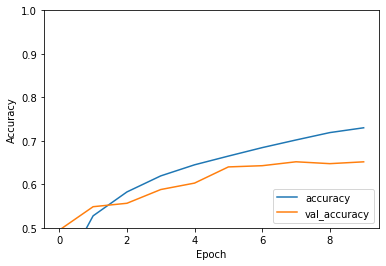

In [ ]:
from numpy.ma.core import shape
import tensorflow as tf
from keras.datasets import cifar10
from keras import activations, layers, models
import numpy as np
import matplotlib.pyplot as plt



(train_img, train_labels),(test_img, test_labels) = cifar10.load_data()
assert train_img.shape == (50000, 32, 32, 3)
assert test_img.shape == (10000, 32, 32, 3)
assert train_labels.shape == (50000, 1)
assert test_labels.shape == (10000, 1)


# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
#                'dog', 'frog', 'horse', 'ship', 'truck']

# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_img[i])
#     # The CIFAR labels happen to be arrays, 
#     # which is why you need the extra index
#     plt.xlabel(class_names[train_labels[i][0]])
# plt.show()

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_img, train_labels, epochs=10, validation_data=(test_img, test_labels))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_img,  test_labels, verbose=2)
print(test_acc)


